## Lesson 15 - Mini Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Input dataFrame
df_BR = pd.read_csv("bid_rigging_df.csv")

In [29]:
#Xử lý dữ liệu: đổi dấu ',' thành '.', chuyển các giá trị trống thành NaN và thay thế các giá trị này bằng trung bình của từng khu vực
df_BR['WWBID'] = df_BR['WWBID'].str.replace(',','.')
df_BR['WWBID'] = pd.to_numeric(df_BR['WWBID'], errors='coerce')
df_BR['WWBID'] = df_BR.groupby('Market')['WWBID'].transform(lambda x: x.fillna(x.mean()))

df_BR['LFWBID'] = df_BR['LFWBID'].str.replace(',','.')
df_BR['LFWBID'] = pd.to_numeric(df_BR['LFWBID'], errors='coerce')
df_BR['LFWBID'] = df_BR.groupby('Market')['LFWBID'].transform(lambda x: x.fillna(x.mean()))

df_BR['LFCBID'] = df_BR['LFCBID'].str.replace(',','.')
df_BR['LFCBID'] = pd.to_numeric(df_BR['LFCBID'], errors='coerce')
df_BR['LFCBID'] = df_BR.groupby('Market')['LFCBID'].transform(lambda x: x.fillna(x.mean()))

df_BR['KYFMO'] = df_BR['KYFMO'].str.replace(',','.')
df_BR['KYFMO'] = pd.to_numeric(df_BR['KYFMO'], errors='coerce')
df_BR['KYFMO'] = df_BR.groupby('Market')['KYFMO'].transform(lambda x: x.fillna(x.mean()))

In [30]:
#Loại bỏ khoảng trắng trong value
df_BR['Market'] = df_BR['Market'].astype(str).str.strip()

In [31]:
#Nhóm dữ liệu theo vùng Tri-COuntry và Surround
df_tri = df_BR[df_BR['Market'] == 'TRI-COUNTY']
df_sur = df_BR[df_BR['Market'] == 'SURROUND']

### Câu 1: Tính toán thị phần 2 cty Meyer và Trauth trong khu vực Tri-country từ 1983 - 1991

In [32]:
#Đếm số gói thầu thắng trong năm
market_share = df_tri.groupby(['Year', 'Winner']).size().unstack(fill_value=0)
#Chuyển về tỉ lệ phần trăm
market_share_pct = market_share.div(market_share.sum(axis=1), axis=0)*100

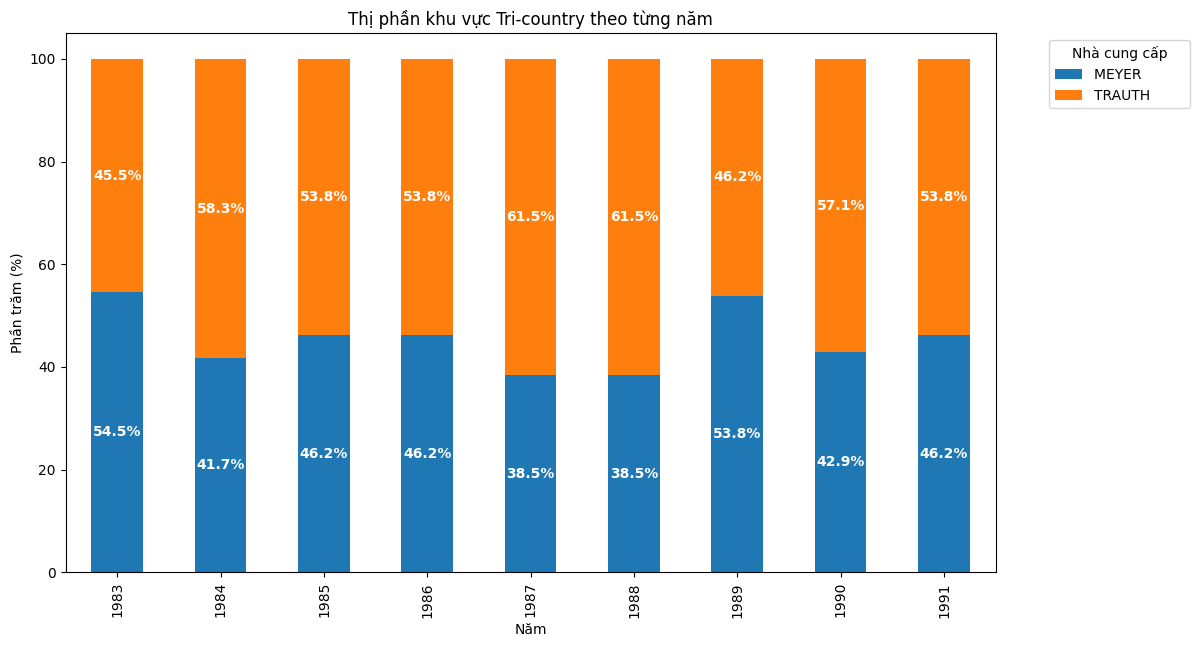

In [33]:
#Vẽ biểu đồ
ax = market_share_pct.plot(kind='bar', stacked=True, figsize=(12,7))

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white', fontweight='bold')

plt.title('Thị phần khu vực Tri-country theo từng năm')
plt.ylabel('Phần trăm (%)')
plt.xlabel('Năm')
plt.legend(title='Nhà cung cấp', bbox_to_anchor=(1.05,1))
plt.tight_layout
plt.show()

### Câu 2: Tính toán tỉ lệ giữ hợp đồng

In [34]:
def calculate_incumbency_rate(data):
    # Sắp xếp theo Học khu và Năm để đảm bảo chuỗi thời gian đúng
    data = data.sort_values(['District', 'Year'])
    
    # Dùng shift(1) để lấy Winner năm trước của CÙNG một District
    data['PREV_WINNER'] = data.groupby('District')['Winner'].shift(1)
    
    # Xác định xem có giữ được hợp đồng không (1 nếu trùng, 0 nếu khác)
    # Loại bỏ các dòng năm đầu tiên của mỗi District (vì PREV_WINNER là NaN)
    valid_data = data.dropna(subset=['PREV_WINNER']).copy()
    valid_data['IS_RETAINED'] = (valid_data['Winner'] == valid_data['PREV_WINNER']).astype(int)
    
    # Tính tỷ lệ trung bình theo từng năm cho khu vực đó
    yearly_rate = valid_data.groupby('Year')['IS_RETAINED'].mean() * 100
    return yearly_rate

In [35]:
inc_tri = calculate_incumbency_rate(df_tri)
inc_sur = calculate_incumbency_rate(df_sur)

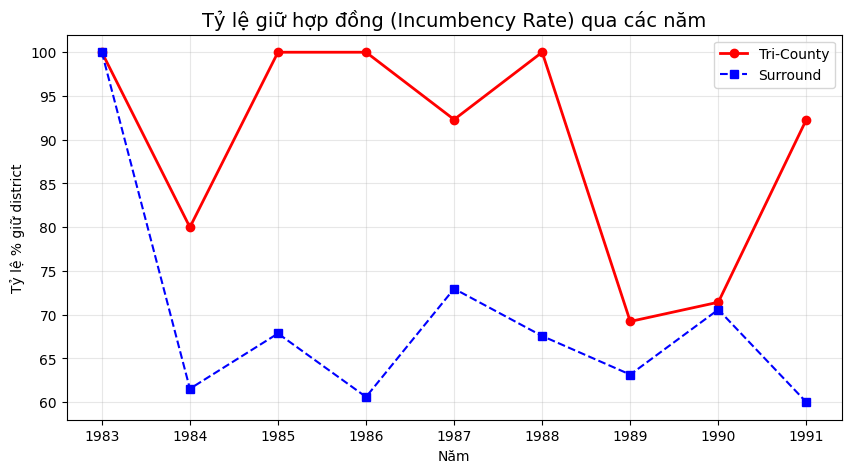

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(inc_tri.index, inc_tri.values, label='Tri-County', marker='o', color='red', linewidth=2)
plt.plot(inc_sur.index, inc_sur.values, label='Surround', marker='s', color='blue', linestyle='--')
plt.title('Tỷ lệ giữ hợp đồng (Incumbency Rate) qua các năm', fontsize=14)
plt.ylabel('Tỷ lệ % giữ district')
plt.xlabel('Năm')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Câu 3 + 4:

In [37]:
#Tính giá trị tb và độ lệch chuẩn theo năm tại 2 khu vực Tri-country và Surround theo từng loại sữa
WWBID_tri = df_tri.groupby('Year')['WWBID'].agg(['mean', 'std'])
WWBID_sur = df_sur.groupby('Year')['WWBID'].agg(['mean', 'std'])
LFWBID_tri = df_tri.groupby('Year')['LFWBID'].agg(['mean', 'std'])
LFWBID_sur = df_sur.groupby('Year')['LFWBID'].agg(['mean', 'std'])
LFCBID_tri = df_tri.groupby('Year')['LFCBID'].agg(['mean', 'std'])
LFCBID_sur = df_sur.groupby('Year')['LFCBID'].agg(['mean', 'std'])

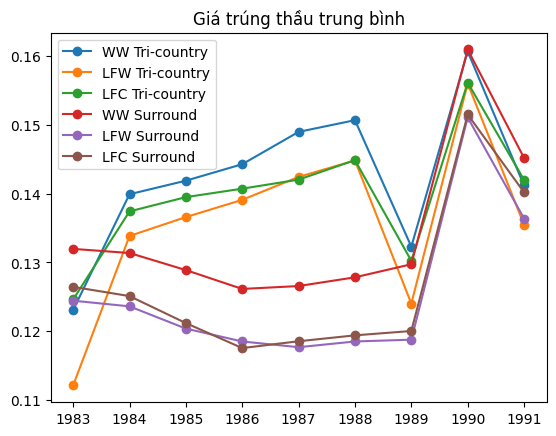

In [38]:
# Biểu đồ giá trung bình
plt.plot(WWBID_tri.index, WWBID_tri['mean'], label='WW Tri-country', marker='o')
plt.plot(LFWBID_tri.index, LFWBID_tri['mean'], label='LFW Tri-country', marker='o')
plt.plot(LFCBID_tri.index, LFCBID_tri['mean'], label='LFC Tri-country', marker='o')
plt.legend()

plt.plot(WWBID_sur.index, WWBID_sur['mean'], label='WW Surround', marker='o')
plt.plot(LFWBID_sur.index, LFWBID_sur['mean'], label='LFW Surround', marker='o')
plt.plot(LFCBID_sur.index, LFCBID_sur['mean'], label='LFC Surround', marker='o')
plt.title('Giá trúng thầu trung bình')
plt.legend()

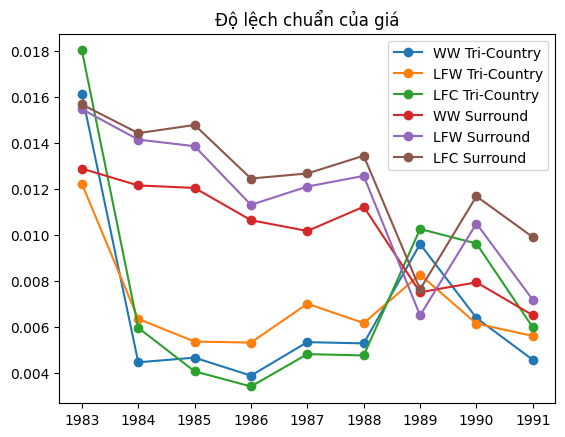

In [39]:

# Biểu đồ độ lệch chuẩn
plt.plot(WWBID_tri.index, WWBID_tri['std'], label='WW Tri-Country', marker='o')
plt.plot(LFWBID_tri.index, LFWBID_tri['std'], label='LFW Tri-Country', marker='o')
plt.plot(LFCBID_tri.index, LFCBID_tri['std'], label='LFC Tri-Country', marker='o')
plt.legend()

plt.plot(WWBID_sur.index, WWBID_sur['std'], label='WW Surround', marker='o')
plt.plot(LFWBID_sur.index, LFWBID_sur['std'], label='LFW Surround', marker='o')
plt.plot(LFCBID_sur.index, LFCBID_sur['std'], label='LFC Surround', marker='o')
plt.title('Độ lệch chuẩn của giá')
plt.legend()

plt.show()

### Câu 5

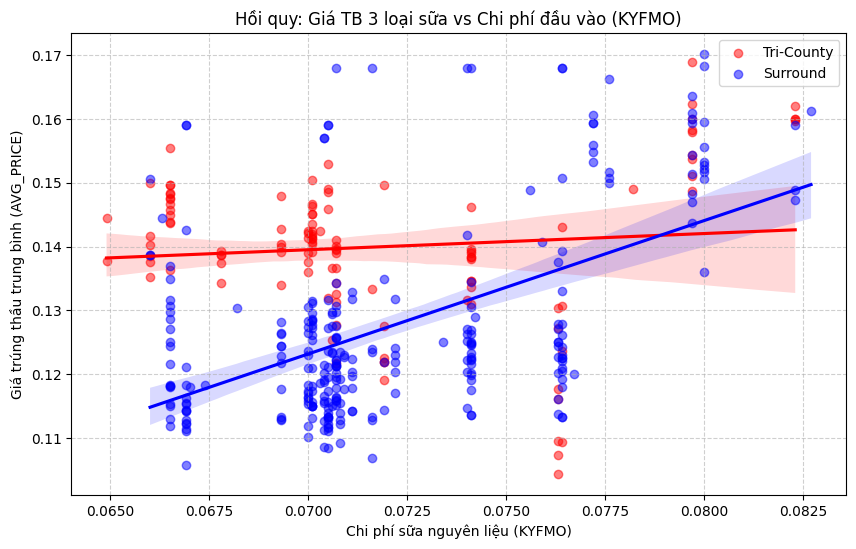

In [44]:
#Tạo cột 'AVG_PRICE' là trung bình của 3 loại sữa
price_cols = ['WWBID', 'LFWBID', 'LFCBID']
df_BR['AVG_PRICE'] = df_BR[price_cols].mean(axis=1)

#Cập nhật lại df_tri và df_sur sau khi đã có cột AVG_PRICE
df_tri = df_BR[df_BR['Market'] == 'TRI-COUNTY']
df_sur = df_BR[df_BR['Market'] == 'SURROUND']

#Hàm thực hiện hồi quy và vẽ biểu đồ
def run_regression_plot(data, title, color):
    # Loại bỏ các dòng bị thiếu dữ liệu ở cột AVG_PRICE hoặc KYFMO
    clean_data = data.dropna(subset=['AVG_PRICE', 'KYFMO'])
    
    X = clean_data['KYFMO']
    y = clean_data['AVG_PRICE']
    
    # Vẽ biểu đồ phân tán và đường hồi quy
    #sns.scatterplot(x=X, y=y, data=clean_data, label=title, color=color, alpha=0.5)
    sns.regplot(x=X, y=y, data=clean_data, label=title, color=color, scatter_kws={'alpha':0.5})
    
    return

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
model_tri = run_regression_plot(df_tri, 'Tri-County', 'red')
model_sur = run_regression_plot(df_sur, 'Surround', 'blue')

plt.title('Hồi quy: Giá TB 3 loại sữa vs Chi phí đầu vào (KYFMO)')
plt.xlabel('Chi phí sữa nguyên liệu (KYFMO)')
plt.ylabel('Giá trúng thầu trung bình (AVG_PRICE)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
